# Libraries and Datasets
in this part we import libraries and load Dataset of Question 5 of HW5-ML

**Import Libraries**

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA

**Load Dataset**

In [ ]:
!gdown 1VL2AOZCzxIHN1vKlBpLTuBEXUImVGJTF
!unzip /content/Q5_Datasets.zip

# Part 1 : PCA

In [2]:
%cd /content/Q5_Datasets/part1/emotion detection dateset

/content/Q5_Datasets/part1/emotion detection dateset


In [10]:
# Set the paths to the train and test folders containing the images
train_folder = 'train'
test_folder = 'test'

# Create empty lists to store the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

In [11]:
# Load the train images and labels
for filename in os.listdir(train_folder):
    if filename.endswith('.tiff'):
        label = filename.split('.')[1]  # Extract the category label from the filename
        if label in ['disgust', 'happy', 'fear', 'angry', 'surprise', 'sad']:
            image = cv2.imread(os.path.join(train_folder, filename), cv2.IMREAD_GRAYSCALE)
            train_images.append(image)
            train_labels.append(label)

# Load the test images and labels
for filename in os.listdir(test_folder):
    if filename.endswith('.tiff'):
        label = filename.split('.')[1]  # Extract the category label from the filename
        if label in ['disgust', 'happy', 'fear', 'angry', 'surprise', 'sad']:
            image = cv2.imread(os.path.join(test_folder, filename), cv2.IMREAD_GRAYSCALE)
            test_images.append(image)
            test_labels.append(label)

In [12]:
# Convert the lists of images and labels into numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Combine train and test images for PCA
combined_images = np.concatenate((train_images, test_images), axis=0)

# Flatten the images
flat_images = combined_images.reshape(combined_images.shape[0], -1)

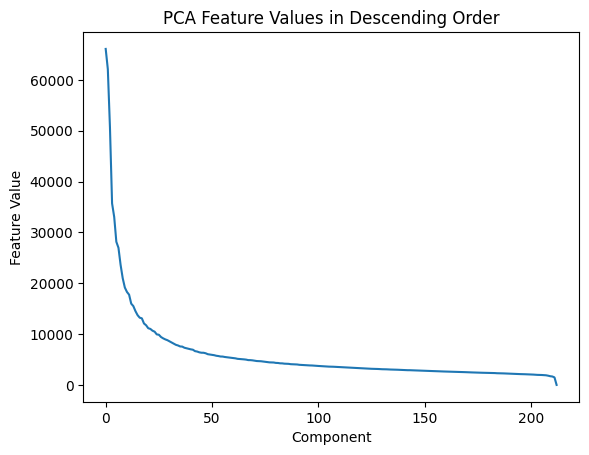

In [14]:
# Perform PCA on the flattened images
pca = PCA()
pca.fit(flat_images)

# Compute the explained variance ratios and cumulative explained variance
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratios)

# Plot the PCA feature values in descending order
pca_feature_values = np.sort(pca.singular_values_)[::-1]
plt.plot(pca_feature_values)
plt.xlabel('Component')
plt.ylabel('Feature Value')
plt.title('PCA Feature Values in Descending Order')
plt.show()

First four eigenvalues:
[66071.71636725 62092.20531852 50675.37713048 35688.65095822]


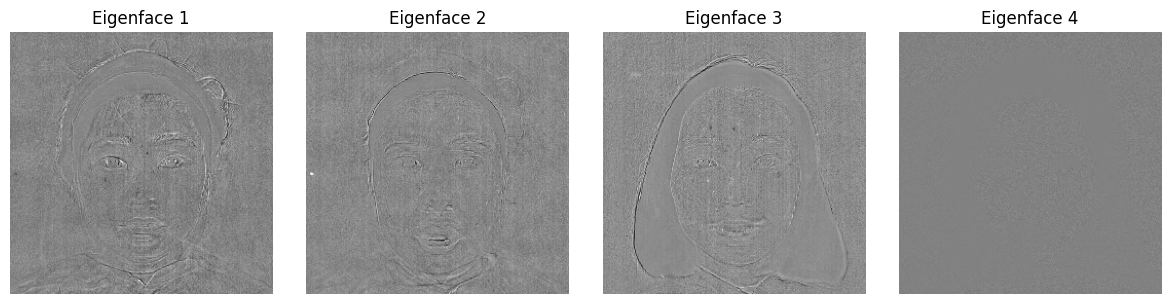

In [15]:
# Display the first four eigenvalues
print("First four eigenvalues:")
print(pca_feature_values[:4])

# Compute and display the final four eigenfaces
final_four_eigenfaces = pca.components_[-4:]
image_shape = train_images[0].shape
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, eigenface in enumerate(final_four_eigenfaces):
    eigenface = eigenface.reshape(image_shape)
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Eigenface {i+1}")
plt.tight_layout()
plt.show()

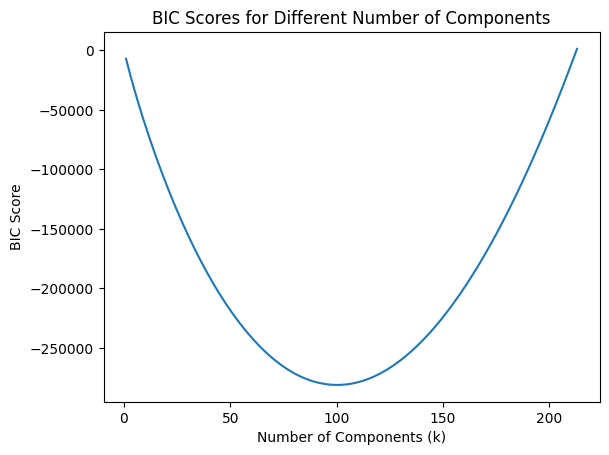

Best number of components (k): 101


In [16]:
# Determine the best number of components (k) using BIC
n_samples = combined_images.shape[0]  # Number of samples in the combined images
bic_scores = []

for k in range(1, pca.n_components_ + 1):
    pca = PCA(n_components=k)
    pca.fit(combined_images)
    log_likelihood = np.sum(np.log(pca.explained_variance_) * (n_samples - k))
    bic_score = -2 * log_likelihood + k * np.log(n_samples)
    bic_scores.append(bic_score)

# Plot the BIC scores
plt.plot(range(1, pca.n_components_ + 1), bic_scores)
plt.xlabel('Number of Components (k)')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Different Number of Components')
plt.show()

# Find the best number of components (k) with the minimum BIC score
best_k = np.argmin(bic_scores) + 1
print("Best number of components (k):", best_k)

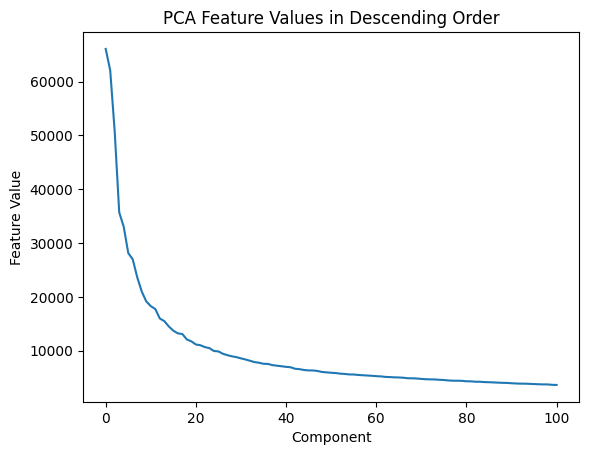

In [17]:
# Perform PCA with the best number of components
pca = PCA(n_components=best_k)
pca.fit(combined_images)

# Compute the explained variance ratios and cumulative explained variance
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratios)

# Plot the PCA feature values in descending order
pca_feature_values = np.sort(pca.singular_values_)[::-1]
plt.plot(pca_feature_values)
plt.xlabel('Component')
plt.ylabel('Feature Value')
plt.title('PCA Feature Values in Descending Order')
plt.show()

First four eigenvalues:
[66071.71636725 62092.20531852 50675.37713048 35688.65095822]


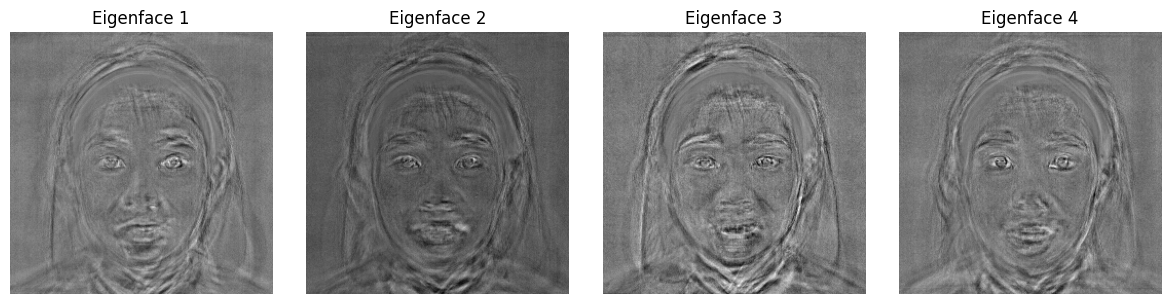

In [18]:
# Display the first four eigenvalues
print("First four eigenvalues:")
print(pca_feature_values[:4])

# Compute and display the final four eigenfaces
final_four_eigenfaces = pca.components_[-4:]
image_shape = train_images[0].shape
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, eigenface in enumerate(final_four_eigenfaces):
    eigenface = eigenface.reshape(image_shape)
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Eigenface {i+1}")
plt.tight_layout()
plt.show()

# Part2 : LDA

In [19]:
%cd /content/Q5_Datasets/part2/Fashion-MNIST

/content/Q5_Datasets/part2/Fashion-MNIST


In [31]:
# Load the data
train_data = pd.read_csv("trainData.csv", header=None)
train_labels = pd.read_csv("trainLabels.csv", header=None)
test_data = pd.read_csv("testData.csv", header=None)
test_labels = pd.read_csv("testLabels.csv", header=None)

In [32]:
# Convert the data and labels to NumPy arrays
train_data = train_data.values
train_labels = train_labels.values.flatten()
test_data = test_data.values
test_labels = test_labels.values.flatten()

In [33]:
# Get the unique class labels
unique_labels = np.unique(train_labels)

In [34]:
# Calculate the overall mean
overall_mean = np.mean(train_data, axis=0)

# Calculate Sw and Sb
Sw = np.zeros((train_data.shape[1], train_data.shape[1]))
Sb = np.zeros((train_data.shape[1], train_data.shape[1]))

for label in unique_labels:
    class_data = train_data[train_labels == label]
    class_cov = np.cov(class_data.T)
    class_scatter = class_data.shape[0] * class_cov
    Sw += class_scatter

    n_samples = np.sum(train_labels == label)
    mean_diff = np.mean(class_data, axis=0) - overall_mean
    class_scatter = n_samples * np.outer(mean_diff, mean_diff)
    Sb += class_scatter


In [35]:
# Compute the eigenvalues of the separability matrix
eigenvalues, _ = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


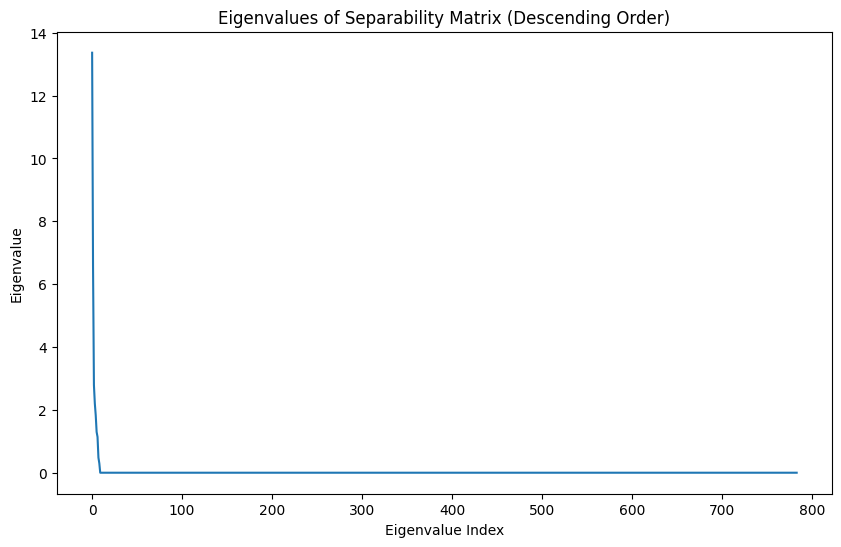

In [36]:
# Plot the eigenvalues of the separability matrix
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_eigenvalues)), sorted_eigenvalues)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Separability Matrix (Descending Order)')
plt.show()

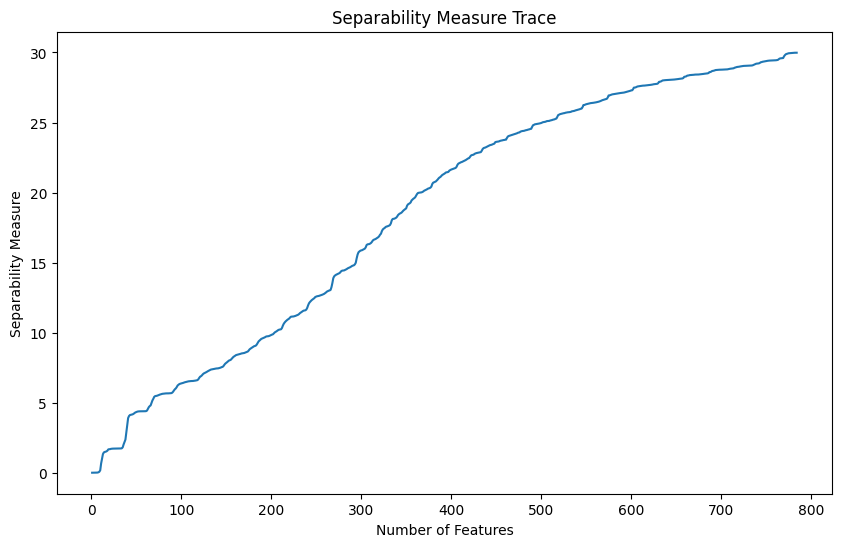

In [38]:
# Calculate the separability measure trace for different numbers of features
num_features = range(1, train_data.shape[1] + 1)
separability_measures = []

for n in num_features:
    selected_features = train_data[:, :n]
    Sw_n = Sw[:n, :n]
    Sb_n = Sb[:n, :n]

    separability_measure = np.trace(np.linalg.inv(Sw_n) @ Sb_n)
    separability_measures.append(separability_measure)

# Plot the separability measure trace
plt.figure(figsize=(10, 6))
plt.plot(num_features, separability_measures)
plt.xlabel('Number of Features')
plt.ylabel('Separability Measure')
plt.title('Separability Measure Trace')
plt.show()